# Machine Learning Spring 2025

> **Project 1 - Temperature Prediction**<br><br>Team: ST_ML2025_2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import math

from lib.feature_pipelines import *
from lib.model_pipelines import *

In [2]:
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

In [4]:
train_df = pd.read_csv("./input/train_dataset.csv")
test_df = pd.read_csv("./input/test_dataset.csv")
station_info_df = pd.read_csv("./input/station_info.csv")
sample_submission_df = pd.read_csv("./input/submission_sample.csv")

# Dataset 분석

주어진 데이터셋의 구성은 다음과 같다.

- `train_dataset.csv`: 동두천, 서울, 강화, 인천, 이천, 양평 관측소의 2019-2024년 데이터셋
- `test_dataset.csv`: 파주, 수원 관측소 데이터셋
- `station_info.csv`: 기상 관측소별 정보

In [5]:
train_df.sample(10)

,id,station,station_name,date,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,...,wind_speed_23,wind_speed_3,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,target
7215,11594,201,강화,10-09,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.1,1.9,1.5,0.5,0.6,1.3,2.4,14.703571,0.696429
10067,14446,202,양평,08-06,3.0,3.0,3.0,7.0,2.0,4.0,...,0.1,0.9,0.6,0.0,0.2,1.4,0.3,0.8,27.342857,1.157143
11064,15443,203,이천,05-03,0.0,0.0,0.0,0.0,0.0,0.0,...,2.1,0.8,0.5,0.4,0.4,0.3,1.1,0.8,16.964286,1.435714
942,942,98,동두천,07-31,5.0,9.0,8.0,8.0,6.0,8.0,...,0.5,0.2,1.8,1.0,0.5,0.0,1.4,0.4,27.760714,-2.560714
2719,4907,108,서울,06-16,9.0,7.0,2.0,4.0,3.0,3.0,...,1.7,2.5,1.2,2.3,0.4,1.3,2.0,2.0,21.791071,2.508929
9127,13506,202,양평,01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,0.6,1.4,1.7,2.1,2.0,1.9,2.2,1.8,-3.380357,2.480357
4393,6581,112,인천,01-16,0.0,0.0,0.0,0.0,0.0,0.0,...,2.7,4.6,4.1,5.1,3.7,4.3,2.6,3.5,-2.512500,3.112500
6588,10967,201,강화,01-20,7.0,6.0,0.0,0.0,0.0,0.0,...,1.2,3.4,2.3,3.0,2.1,2.6,2.6,4.0,-1.571429,-0.028571
11220,15599,203,이천,10-07,0.0,1.0,1.0,2.0,8.0,8.0,...,1.1,0.7,0.6,0.7,0.7,0.3,0.1,0.8,15.542857,-1.142857
3066,5254,108,서울,05-29,7.0,2.0,1.0,2.0,4.0,4.0,...,1.7,3.0,3.0,2.5,1.0,1.2,2.1,1.8,19.648214,-1.248214


In [6]:
train_df.describe()

,id,station,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,cloud_cover_14,cloud_cover_15,...,wind_speed_23,wind_speed_3,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,target
count,13132.000000,13132.000000,12945.000000,12920.000000,12916.000000,12926.000000,12931.000000,12926.000000,12919.000000,12938.000000,...,13122.000000,13120.000000,13116.000000,13112.000000,13119.000000,13120.000000,13125.000000,13127.000000,13132.000000,13132.000000
mean,9484.110493,153.980658,2.915798,3.022291,3.126742,3.092063,3.046400,3.035046,2.992182,2.911115,...,-0.032754,-2.491814,-0.234637,-1.011882,-4.068389,-7.119787,-10.073272,-9.119029,12.658557,0.221979
std,5311.954253,48.183220,3.646779,3.652165,3.659422,3.589739,3.512063,3.483002,3.462070,3.440298,...,123.464434,195.197628,123.489868,151.258218,230.949420,289.453706,337.895538,326.432094,10.023504,2.960544
min,0.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-4.487500,-12.864286
25%,5470.750000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.600000,0.400000,0.400000,0.400000,0.400000,0.400000,0.500000,0.700000,3.292857,-1.643052
50%,8753.500000,112.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.200000,1.000000,0.900000,0.900000,0.900000,0.900000,1.000000,1.300000,12.842857,0.157143
75%,14227.250000,202.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000,...,2.100000,1.900000,1.900000,1.800000,1.800000,1.800000,2.000000,2.200000,22.271429,2.045536
max,17510.000000,203.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.700000,11.300000,9.500000,10.600000,12.400000,11.100000,11.300000,9.400000,28.455357,11.778571


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13132 entries, 0 to 13131
Columns: 342 entries, id to target
dtypes: float64(338), int64(2), object(2)
memory usage: 34.3+ MB


## Feature 분석

### Feature 분류 및 설명

In [8]:
def search_time_based_feature_names(df):
    "각 시간별로 구성된 feature들(e.g. 'cloud_cover_0', 'cloud_cover_1' ...)에 대해 각각의 고유한 이름(e.g. 'cloud_cover')을 찾는다."

    time_based_features_pattern = re.compile(r"^(.*)_(\d{1,2})$")
    searched_time_based_feature_names = set()

    for column in df.columns:
        match = time_based_features_pattern.match(column)
        if match:
            feature_name, hour = match.groups()
            hour = int(hour)
            searched_time_based_feature_names.add(feature_name)

    return searched_time_based_feature_names

time_based_feature_names = search_time_based_feature_names(train_df)

print(len(time_based_feature_names))
print(time_based_feature_names)

14
{'local_pressure', 'min_cloud_height', 'surface_temp', 'humidity', 'sunshine_duration', 'vapor_pressure', 'snow_depth', 'sea_level_pressure', 'visibility', 'wind_direction', 'wind_speed', 'dew_point', 'precipitation', 'cloud_cover'}


train dataset에 있는 feature를 특성에 따라 다음과 같은 카테고리별로 정리하였다.

1. Data 식별
   - `id`: 순서(identical)
   - `station`: 지상관측소 번호(98: "동두천", 201: "강화" 등)
   - `station_name`: 지상관측소 이름("동두천", "서울", "강화" 등)
   - `date`: 날짜(월-일 형식, 1월 29일은 "01-29"로 표기)

2. 구름 관련 feature
    - `cloud_cover_[0-23]`: 증하층운량(10분위, 0~10)
    - `min_cloud_height_[0-23]`: 시간별 최저운고(100m 단위)

3. 온도 관련 feature
    - `dew_point_[0-23]`: 시간별 이슬점 온도(°C)
    - `surface_temp_[0-23]`: 시간별 지면온도(°C)
    - `climatology_temp`: 해당 날짜의 평균 기온(°C) (7년 동안 평균)

4. 습도 관련 feature
    - `humidity_[0-23]`: 시간별 습도(%)
    - `vapor_pressure_[0-23]`: 시간별 증기압(hPa)
    - `percipitation_[0-23]`: 시간별 강수량(mm)
    - `snow_depth_[0-23]`: 시간별 적설(cm)

5. 기압 관련 feature
    - `local_pressure_[0-23]`: 시간별 현지기압(hPa)
    - `sea_level_pressure_[0-23]`: 시간별 해면기압(hPa)

6. 가시성 관련 feature
    - `visibility_[0-23]`: 시간별 시정(10m 단위)
    - `sunshine_duration_[0-23]`: 시간별 일조(hr)

7. 바람 관련 feature
    - `wind_speed_[0-23]`: 시간별 풍속(m/s)
    - `wind_direction_[0-23]`: 시간별 풍향(도 단위)

8. target feature
    - `target`: 시간별 기온(°C, 다음날 평균 기온(°C)에서 `climatology_temp`를 뺀 값)


### 결측치 패턴

1. `-9999`: 관측소 기계에서 감지한 결측치 또는 이상치
2. `NaN`:
    - `sunshine_duration`: 야간 시간대(0, 1, 2, 3, 4, 5, 22, 23시), 즉 해가 없는 시간대
    - `snow_depth`: 눈이 오지 않은 경우
    - `precipitation`: 비가 오지 않은 경우




### 결측치 식별

#### Time-based feature에 대한 결측치
**시간대별 결측률 분석**

In [9]:
def analyze_time_based_features_missing_by_hour(ax, df, base_name):
    hour_missing = {}

    cols = [col for col in df.columns if col.startswith(base_name + "_")]

    for col in cols:
        try:
            hour = int(col.split("_")[-1])
            missing_ratio = df[col].isnull().mean()
            hour_missing[hour] = missing_ratio
        except ValueError:
            continue

    hours = sorted(hour_missing.keys())
    missing_values = [hour_missing[h] for h in hours]

    sns.lineplot(x=hours, y=missing_values, marker="o", ax=ax, color="steelblue")
    ax.set_title(f"{base_name}")
    ax.set_xlabel("Hour")
    ax.set_ylabel("Missing Ratio")
    ax.set_xticks(hours)
    ax.set_ylim(0, max(missing_values) + 0.0025)
    ax.grid(True, linestyle="--", alpha=0.5)

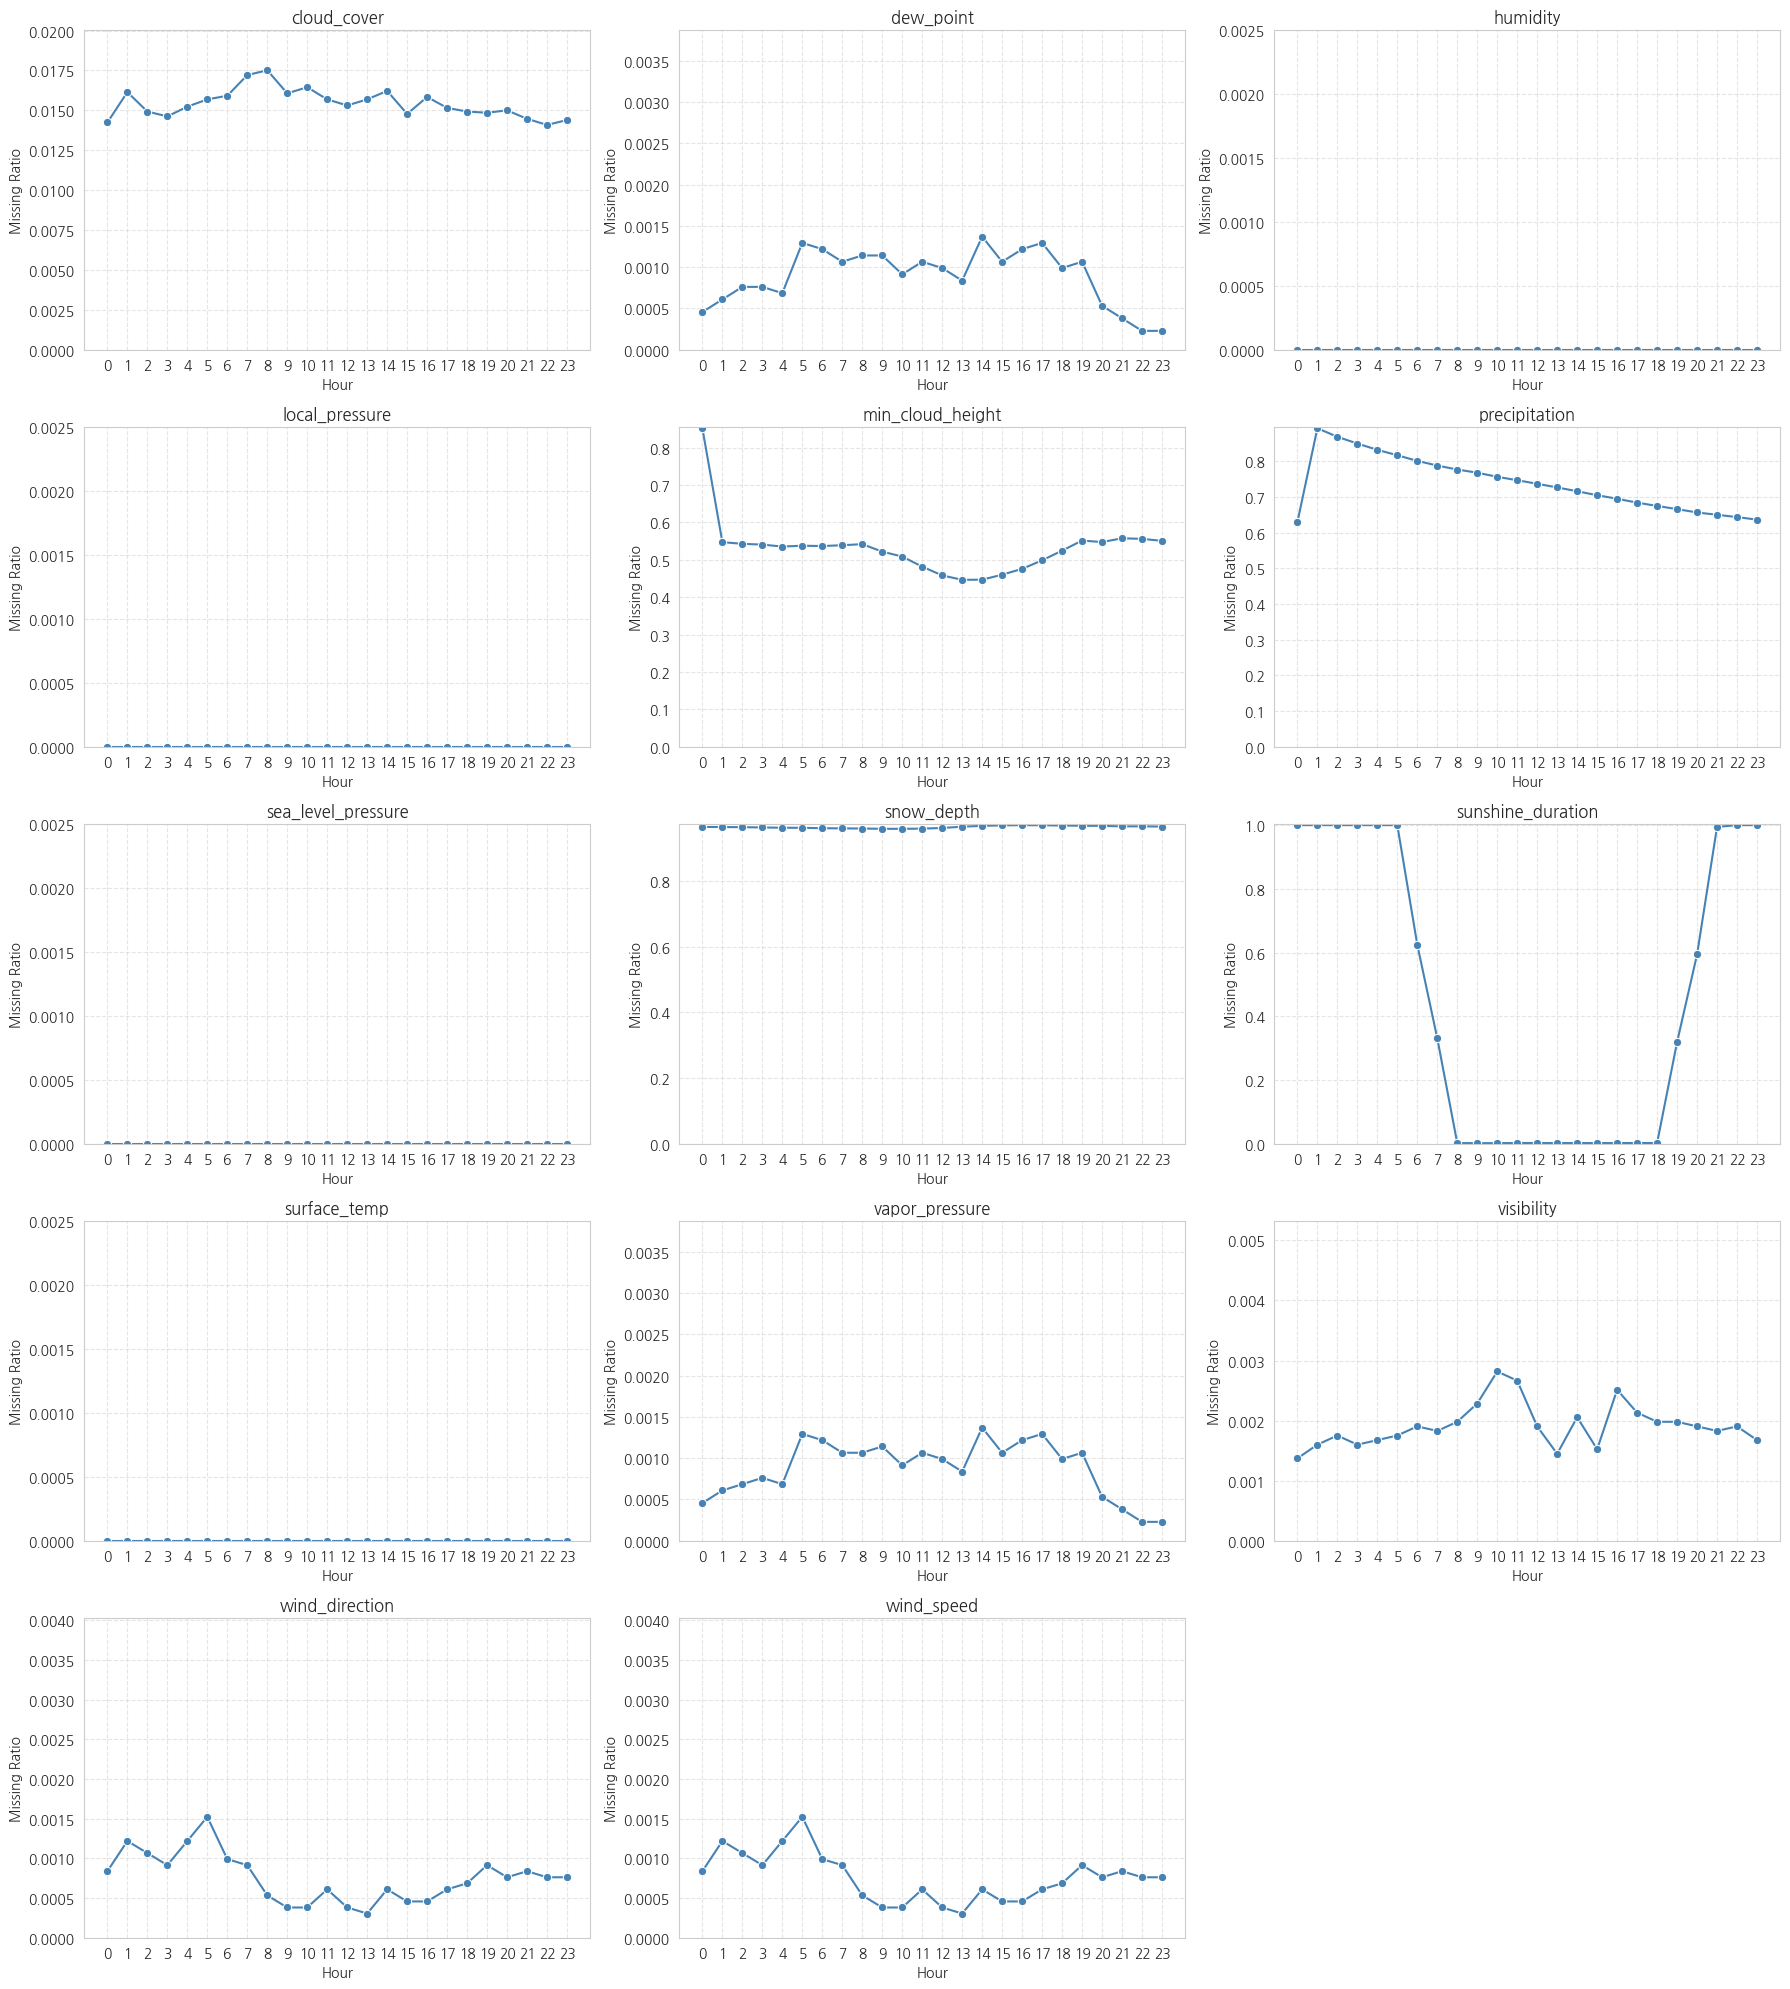

In [10]:
num_features = len(time_based_feature_names)
n_cols = 3
n_rows = math.ceil(num_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(sorted(time_based_feature_names)):
    analyze_time_based_features_missing_by_hour(axes[i], train_df, feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Time-based feature 종류별 평균 결측치 비율**

In [11]:
def analyze_missing_values_by_time_groups(df, time_based_feature_names):
    group_missing_summary = []

    for base_name in time_based_feature_names:
        cols = [col for col in df.columns if col.startswith(base_name + "_")]
        if not cols:
            continue
        missing_ratio = df[cols].isnull().mean().mean()  # 각 시간대의 평균 결측률
        group_missing_summary.append((base_name, missing_ratio))

    summary_df = pd.DataFrame(group_missing_summary, columns=["feature_group", "mean_missing_ratio"])
    summary_df = summary_df.sort_values(by="mean_missing_ratio", ascending=False).reset_index(drop=True)
    return summary_df

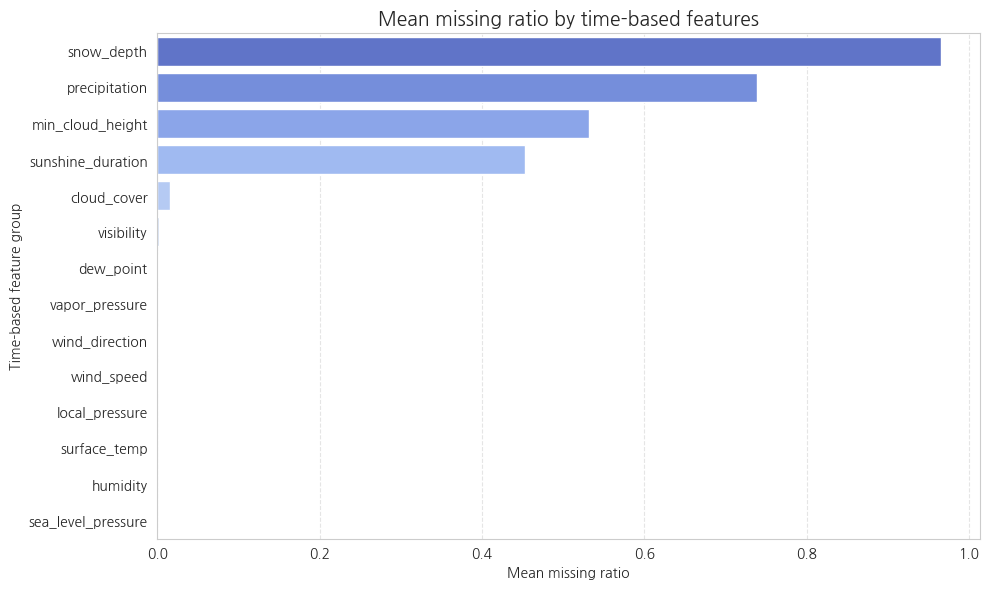

In [12]:
group_missing_ratio = analyze_missing_values_by_time_groups(train_df, time_based_feature_names)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=group_missing_ratio,
    x="mean_missing_ratio",
    y="feature_group",
    hue="feature_group",
    palette="coolwarm",
)
plt.title("Mean missing ratio by time-based features", fontsize=14)
plt.xlabel("Mean missing ratio")
plt.ylabel("Time-based feature group")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## EDA & Feature Engineering

### 결측치 처리

**결측치 처리 방법**

1. -9999는 NaN으로 처리
2. `snow_depth`, `precipitation`, `min_cloud_height`, `sunshine_duration`과 같이 결측치 비율이 높은 feature 처리 논의...
3. `sunshine_duration`이 야간에 결측치 -> 0으로 처리

In [13]:
print("결측치 처리 전 train_df 결측치 개수")
print(train_df.isnull().sum().sum())

train_df = missing_values.handle_missing_values(train_df, time_based_feature_names)

print("결측치 처리 후 train_df 결측치 개수")
print(train_df.isnull().sum().sum())

print("="*30)

print("결측치 처리 전 test_df 결측치 개수")
print(test_df.isnull().sum().sum())

test_df = missing_values.handle_missing_values(test_df, time_based_feature_names)

print("결측치 처리 후 test_df 결측치 개수")
print(test_df.isnull().sum().sum())

결측치 처리 전 train_df 결측치 개수
853979
결측치 처리 후 train_df 결측치 개수
0
결측치 처리 전 test_df 결측치 개수
282316
결측치 처리 후 test_df 결측치 개수
0


### Feature Engineering

In [14]:
train_df = feature_engineering.get_engineered_df(train_df, time_based_feature_names)
test_df = feature_engineering.get_engineered_df(test_df, time_based_feature_names)

In [15]:
train_df.head()

,id,station,station_name,date,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,...,dew_point_afternoon_mean,dew_point_evening_mean,precipitation_night_mean,precipitation_morning_mean,precipitation_afternoon_mean,precipitation_evening_mean,cloud_cover_night_mean,cloud_cover_morning_mean,cloud_cover_afternoon_mean,cloud_cover_evening_mean
0,0,98,동두천,01-01,0.0,0.0,9.0,0.0,3.0,3.0,...,-14.866667,-17.183333,0.899592,0.971694,1.057886,0.963557,0.666667,5.333333,1.166667,0.000000
1,1,98,동두천,01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,-19.166667,-17.033333,0.899592,0.971694,1.057886,0.963557,0.000000,0.000000,0.000000,0.000000
2,2,98,동두천,01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,-20.000000,-18.550000,0.899592,0.971694,1.057886,0.963557,0.000000,0.000000,0.000000,0.000000
3,3,98,동두천,01-04,0.0,0.0,2.0,0.0,0.0,1.0,...,-10.833333,-5.600000,0.899592,0.971694,1.057886,0.963557,0.000000,1.333333,1.833333,1.666667
4,4,98,동두천,01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,-19.966667,-20.066667,0.899592,0.971694,1.057886,0.963557,1.000000,0.000000,0.000000,0.000000


### Reduce Columns

In [16]:
train_df, train_dropped_cols = feature_reduction.reduce_feature_columns(train_df, time_based_feature_names)
test_df, test_dropped_cols = feature_reduction.reduce_feature_columns(test_df, time_based_feature_names)

In [17]:
train_df.head()

,id,station,station_name,date,climatology_temp,target,month,day,day_of_year,month_sin,...,dew_point_afternoon_mean,dew_point_evening_mean,precipitation_night_mean,precipitation_morning_mean,precipitation_afternoon_mean,precipitation_evening_mean,cloud_cover_night_mean,cloud_cover_morning_mean,cloud_cover_afternoon_mean,cloud_cover_evening_mean
0,0,98,동두천,01-01,-2.707143,-3.992857,1,1,31,0.5,...,-14.866667,-17.183333,0.899592,0.971694,1.057886,0.963557,0.666667,5.333333,1.166667,0.000000
1,1,98,동두천,01-02,-3.646429,-1.653571,1,2,32,0.5,...,-19.166667,-17.033333,0.899592,0.971694,1.057886,0.963557,0.000000,0.000000,0.000000,0.000000
2,2,98,동두천,01-03,-2.694643,-0.005357,1,3,33,0.5,...,-20.000000,-18.550000,0.899592,0.971694,1.057886,0.963557,0.000000,0.000000,0.000000,0.000000
3,3,98,동두천,01-04,-2.501786,-0.898214,1,4,34,0.5,...,-10.833333,-5.600000,0.899592,0.971694,1.057886,0.963557,0.000000,1.333333,1.833333,1.666667
4,4,98,동두천,01-05,-2.625000,-1.775000,1,5,35,0.5,...,-19.966667,-20.066667,0.899592,0.971694,1.057886,0.963557,1.000000,0.000000,0.000000,0.000000


## Train

#### 1. Linear regression

In [18]:
linear_regression.linear_regression_model(train_df)

{'MAE': np.float64(1.4124622180057673), 'RMSE': np.float64(1.8439686540862539), 'R2': np.float64(0.6033040479880903)}


#### 2. Polynomial regression

In [19]:
# degree = 2
polynomial.polynomial_model(train_df)

{'MAE': np.float64(1.2466573130179495), 'RMSE': np.float64(1.7205600657341236), 'R2': np.float64(0.6606685821624211)}


In [ ]:
# degree = 3
polynomial.polynomial_model(train_df, degree=3)